## BGG Ranked Games EDA

### Imports

In [4]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

from IPython.display import Image, display, Markdown

### Functions

In [6]:
# Function to show the dimensions, column zero counts, column datatypes, column null counts, and the first and last 5 rows of the input dataframe
def check_df(df):
    # Display the dimensions of the DataFrame
    display(Markdown("#### DataFrame dimensions"))
    display(df.shape)

    # Add a new line
    display(Markdown("<br>"))

    # Display data types of all columns
    display(Markdown("#### Data Types, zeros and nulls"))
    display(pd.DataFrame({
        "Data type": df.dtypes,
        "Zero counts": (df == 0).sum(),
        "Zero count %": (((df == 0).sum()/df.count())* 100).round(2),
        "Null counts": df.isnull().sum(),
        "Null count %": ((df.isnull().sum())/(df.count()+df.isnull().sum())* 100).round(2)
    }))

# Function to return a dataframe with rows filtered by a specified word in a specified column:
def df_keyword_search(df, column, word):
    # Ensure the column is treated as strings and handle NaN values by replacing them with empty strings
    column_data = df[column].fillna('').astype(str)
    
    # Filter the DataFrame based on the presence of the word in the specified column, case insensitive
    keyword_df = df.loc[column_data.str.contains(rf'\b{word}\b', case=False, regex=True)]
    
    return keyword_df

### Loading BGG ranked games data

In [8]:
# Creating dataframe from raw boardgames_ranks.csv data from BGG website
rank_df = pd.read_csv('boardgames_ranks.csv')

### Formatting

In [10]:
# Changing each string element of the dataframe to lower case to support with EDA
rank_df = rank_df.map(lambda x: x.lower() if isinstance(x, str) else x)

# Checking changes have been made
rank_df.head(5)

id                               name  yearpublished  rank  \
0  224517                  brass: birmingham           2018     1   
1  161936          pandemic legacy: season 1           2015     2   
2  174430                         gloomhaven           2017     3   
3  342942                           ark nova           2021     4   
4  233078  twilight imperium: fourth edition           2017     5   

   bayesaverage  average  usersrated  is_expansion  abstracts_rank  cgs_rank  \
0       8.41509  8.59780       45924             0             NaN       NaN   
1       8.37995  8.52747       53515             0             NaN       NaN   
2       8.35320  8.58904       62182             0             NaN       NaN   
3       8.33425  8.53493       43527             0             NaN       NaN   
4       8.24195  8.60175       23816             0             NaN       NaN   

   childrensgames_rank  familygames_rank  partygames_rank  strategygames_rank  \
0                  NaN               NaN              NaN                 1.0   
1                  NaN               NaN              NaN                 2.0   
2                  NaN               NaN              NaN                 4.0   
3                  NaN               NaN              NaN                 3.0   
4                  NaN               NaN              NaN                 5.0   

   thematic_rank  wargames_rank  
0            NaN            NaN  
1            1.0            NaN  
2            2.0            NaN  
3            NaN            NaN  
4            3.0            NaN

### Data overview

In [12]:
# Checking contents of boardgames_ranks.csv
check_df(rank_df)

#### DataFrame dimensions

(155634, 16)

<br>

#### Data Types, zeros and nulls

Data type  Zero counts  Zero count %  Null counts  \
id                      int64            0          0.00            0   
name                   object            0          0.00            0   
yearpublished           int64        11558          7.43            0   
rank                    int64       129072         82.93            0   
bayesaverage          float64       118638         76.23            0   
average               float64        34862         22.40            0   
usersrated              int64        34862         22.40            0   
is_expansion            int64       122439         78.67            0   
abstracts_rank        float64            0          0.00       154199   
cgs_rank              float64            0          0.00       155275   
childrensgames_rank   float64            0          0.00       154574   
familygames_rank      float64            0          0.00       152415   
partygames_rank       float64            0          0.00       154737   
strategygames_rank    float64            0          0.00       152688   
thematic_rank         float64            0          0.00       153981   
wargames_rank         float64            0          0.00       151377   

                     Null count %  
id                           0.00  
name                         0.00  
yearpublished                0.00  
rank                         0.00  
bayesaverage                 0.00  
average                      0.00  
usersrated                   0.00  
is_expansion                 0.00  
abstracts_rank              99.08  
cgs_rank                    99.77  
childrensgames_rank         99.32  
familygames_rank            97.93  
partygames_rank             99.42  
strategygames_rank          98.11  
thematic_rank               98.94  
wargames_rank               97.26

In [13]:
# Checking first 5 rows of rank_df
rank_df.head(5)

id                               name  yearpublished  rank  \
0  224517                  brass: birmingham           2018     1   
1  161936          pandemic legacy: season 1           2015     2   
2  174430                         gloomhaven           2017     3   
3  342942                           ark nova           2021     4   
4  233078  twilight imperium: fourth edition           2017     5   

   bayesaverage  average  usersrated  is_expansion  abstracts_rank  cgs_rank  \
0       8.41509  8.59780       45924             0             NaN       NaN   
1       8.37995  8.52747       53515             0             NaN       NaN   
2       8.35320  8.58904       62182             0             NaN       NaN   
3       8.33425  8.53493       43527             0             NaN       NaN   
4       8.24195  8.60175       23816             0             NaN       NaN   

   childrensgames_rank  familygames_rank  partygames_rank  strategygames_rank  \
0                  NaN               NaN              NaN                 1.0   
1                  NaN               NaN              NaN                 2.0   
2                  NaN               NaN              NaN                 4.0   
3                  NaN               NaN              NaN                 3.0   
4                  NaN               NaN              NaN                 5.0   

   thematic_rank  wargames_rank  
0            NaN            NaN  
1            1.0            NaN  
2            2.0            NaN  
3            NaN            NaN  
4            3.0            NaN

In [14]:
# Checking last 5 rows of rank_df
rank_df.tail(5)

id                                           name  yearpublished  \
155629  423871         worldspanner factions, set 2: expanses           2024   
155630  423872                                 khanhoo master           2022   
155631  423873             worldspanner factions, set 3: foes           2024   
155632  423889                             chicago grand slam           2024   
155633  423890  cyberpunk unfolds: pop-up mystery escape game           2024   

        rank  bayesaverage  average  usersrated  is_expansion  abstracts_rank  \
155629     0           0.0      0.0           0             1             NaN   
155630     0           0.0      0.0           0             0             NaN   
155631     0           0.0      0.0           0             1             NaN   
155632     0           0.0      0.0           0             0             NaN   
155633     0           0.0      0.0           0             0             NaN   

        cgs_rank  childrensgames_rank  familygames_rank  partygames_rank  \
155629       NaN                  NaN               NaN              NaN   
155630       NaN                  NaN               NaN              NaN   
155631       NaN                  NaN               NaN              NaN   
155632       NaN                  NaN               NaN              NaN   
155633       NaN                  NaN               NaN              NaN   

        strategygames_rank  thematic_rank  wargames_rank  
155629                 NaN            NaN            NaN  
155630                 NaN            NaN            NaN  
155631                 NaN            NaN            NaN  
155632                 NaN            NaN            NaN  
155633                 NaN            NaN            NaN

### Year published

In [18]:
# rank_df filtered by year published in ascending order
rank_df.sort_values(by = 'yearpublished', ascending = True)

id                      name  yearpublished   rank  bayesaverage  \
10121     2399                     senet          -3500  10122       5.57084   
20962    11726              knucklebones          -3000  20963       5.50518   
27579     4148                     mehen          -3000      0       0.00000   
26418     5546                   marbles          -3000  26419       5.34831   
40581    23211                20 squares          -3000      0       0.00000   
...        ...                       ...            ...    ...           ...   
152387  415216  hunter's crest: darkwood           2026      0       0.00000   
133913  352225         terminus frontier           2026      0       0.00000   
148695  403137        versailles request           2026      0       0.00000   
114893  291276             criminal city           2026      0       0.00000   
154156  420465       carnival of shadows           2028      0       0.00000   

        average  usersrated  is_expansion  abstracts_rank  cgs_rank  \
10121   5.83515         838             0           906.0       NaN   
20962   6.00000          42             0             NaN       NaN   
27579   5.33684          19             0             NaN       NaN   
26418   4.74441         538             0             NaN       NaN   
40581   4.50000           2             0             NaN       NaN   
...         ...         ...           ...             ...       ...   
152387  0.00000           0             0             NaN       NaN   
133913  5.50000           2             0             NaN       NaN   
148695  9.00000           1             0             NaN       NaN   
114893  0.00000           0             0             NaN       NaN   
154156  0.00000           0             0             NaN       NaN   

        childrensgames_rank  familygames_rank  partygames_rank  \
10121                   NaN               NaN              NaN   
20962                   NaN               NaN              NaN   
27579                   NaN               NaN              NaN   
26418                 995.0               NaN              NaN   
40581                   NaN               NaN              NaN   
...                     ...               ...              ...   
152387                  NaN               NaN              NaN   
133913                  NaN               NaN              NaN   
148695                  NaN               NaN              NaN   
114893                  NaN               NaN              NaN   
154156                  NaN               NaN              NaN   

        strategygames_rank  thematic_rank  wargames_rank  
10121                  NaN            NaN            NaN  
20962                  NaN            NaN            NaN  
27579                  NaN            NaN            NaN  
26418                  NaN            NaN            NaN  
40581                  NaN            NaN            NaN  
...                    ...            ...            ...  
152387                 NaN            NaN            NaN  
133913                 NaN            NaN            NaN  
148695                 NaN            NaN            NaN  
114893                 NaN            NaN            NaN  
154156                 NaN            NaN            NaN  

[155634 rows x 16 columns]

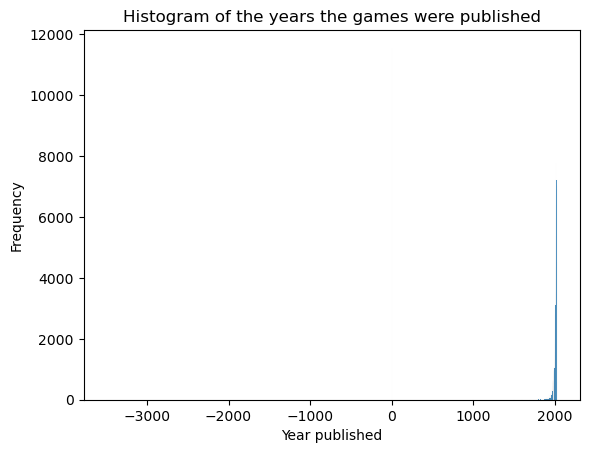

In [19]:
# Histogram plot of the year the game was published - no filters
sns.histplot(rank_df['yearpublished'])
plt.title('Histogram of the years the games were published')
plt.xlabel("Year published")
plt.ylabel("Frequency")
plt.show()

In [20]:
# rank_df filtered by year published for values which have 4 digits and for games made in and between 1900 to 2024
rank_df.loc[(rank_df['yearpublished'].astype(str).str.len() == 4) & 
            (rank_df['yearpublished']>=1900) &
            (rank_df['yearpublished']<2025)].sort_values(by = 'yearpublished', ascending = True)

id                                                     name  \
46913    30982                         grand national steeplechase game   
116863  298140                               the national football game   
77034   139956                              the merry game of bicycling   
66919   100110                                        spin and old maid   
103956  247318                                                cake walk   
...        ...                                                      ...   
6771    291334  tanto monta: the rise of ferdinand & isabella 1470-1516   
146930  396953                                         the holiest crap   
133154  350240  history of the ancient seas: expansion iii – new armies   
151528  412522                                                bangarang   
155633  423890            cyberpunk unfolds: pop-up mystery escape game   

        yearpublished  rank  bayesaverage   average  usersrated  is_expansion  \
46913            1900     0       0.00000   4.47222          18             0   
116863           1900     0       0.00000   0.00000           0             0   
77034            1900     0       0.00000   0.00000           0             0   
66919            1900     0       0.00000   5.00000           1             0   
103956           1900     0       0.00000   0.00000           0             0   
...               ...   ...           ...       ...         ...           ...   
6771             2024  6772       5.64942   7.88970         190             0   
146930           2024     0       0.00000   4.00000           1             0   
133154           2024     0       0.00000  10.00000           1             1   
151528           2024     0       0.00000   8.00000           1             0   
155633           2024     0       0.00000   0.00000           0             0   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
46913              NaN       NaN                  NaN               NaN   
116863             NaN       NaN                  NaN               NaN   
77034              NaN       NaN                  NaN               NaN   
66919              NaN       NaN                  NaN               NaN   
103956             NaN       NaN                  NaN               NaN   
...                ...       ...                  ...               ...   
6771               NaN       NaN                  NaN               NaN   
146930             NaN       NaN                  NaN               NaN   
133154             NaN       NaN                  NaN               NaN   
151528             NaN       NaN                  NaN               NaN   
155633             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  
46913               NaN                 NaN            NaN            NaN  
116863              NaN                 NaN            NaN            NaN  
77034               NaN                 NaN            NaN            NaN  
66919               NaN                 NaN            NaN            NaN  
103956              NaN                 NaN            NaN            NaN  
...                 ...                 ...            ...            ...  
6771                NaN                 NaN            NaN          799.0  
146930              NaN                 NaN            NaN            NaN  
133154              NaN                 NaN            NaN            NaN  
151528              NaN                 NaN            NaN            NaN  
155633              NaN                 NaN            NaN            NaN  

[142438 rows x 16 columns]

In [21]:
# Histogram plot of the games published in and after 1900
sns.histplot(rank_df.loc[(rank_df['yearpublished'].astype(str).str.len() == 4) & 
             (rank_df['yearpublished'] >= 1900),'yearpublished'])
plt.title('Histogram of the games published in and after 1900')
plt.xlabel("Year published")
plt.ylabel("Frequency")
plt.show()

In [22]:
# rank_df filtered by year published for values which have 4 digits and for games made in and between 1900 to 2024
rank_df.loc[(rank_df['yearpublished'].astype(str).str.len() == 4) & 
            (rank_df['yearpublished']>=1900) &
            (rank_df['yearpublished']<2025) &
            (rank_df['rank']>0)].sort_values(by = 'yearpublished', ascending = True)

id             name  yearpublished   rank  bayesaverage  average  \
17935   17183             1001           1900  17936       5.51686  6.42143   
14957   14765            tuppi           1900  14958       5.52952  7.22162   
24693   17755  schnipp schnapp           1900  24694       5.48216  4.80400   
2044      140              pit           1903   2045       6.19281  6.39073   
26034    2294           flinch           1903  26035       5.44447  5.24904   
...       ...              ...            ...    ...           ...      ...   
15069  401505      fantasyform           2024  15070       5.52903  7.64516   
9402   354335  palm laboratory           2024   9403       5.58199  7.35738   
15241  374130        tentricks           2024  15242       5.52827  6.95119   
17634  414082        woof days           2024  17635       5.51779  7.96176   
16540  382549            biome           2024  16541       5.52263  8.22857   

       usersrated  is_expansion  abstracts_rank  cgs_rank  \
17935          42             0             NaN       NaN   
14957          37             0             NaN       NaN   
24693          50             0             NaN       NaN   
2044         9554             0             NaN       NaN   
26034         489             0             NaN       NaN   
...           ...           ...             ...       ...   
15069          31             0             NaN       NaN   
9402          106             0             NaN       NaN   
15241          59             0             NaN       NaN   
17634          34             0             NaN       NaN   
16540          35             0             NaN       NaN   

       childrensgames_rank  familygames_rank  partygames_rank  \
17935                  NaN               NaN              NaN   
14957                  NaN               NaN              NaN   
24693                820.0               NaN              NaN   
2044                   NaN             752.0            200.0   
26034                  NaN            3101.0              NaN   
...                    ...               ...              ...   
15069                  NaN               NaN              NaN   
9402                   NaN               NaN              NaN   
15241                  NaN               NaN              NaN   
17634                  NaN               NaN              NaN   
16540                  NaN               NaN              NaN   

       strategygames_rank  thematic_rank  wargames_rank  
17935                 NaN            NaN            NaN  
14957                 NaN            NaN            NaN  
24693                 NaN            NaN            NaN  
2044                  NaN            NaN            NaN  
26034                 NaN            NaN            NaN  
...                   ...            ...            ...  
15069                 NaN            NaN            NaN  
9402                  NaN            NaN            NaN  
15241                 NaN            NaN            NaN  
17634                 NaN            NaN            NaN  
16540                 NaN            NaN            NaN  

[26183 rows x 16 columns]

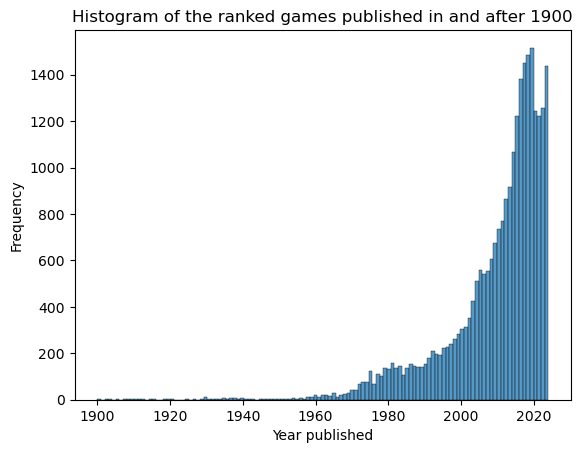

In [23]:
# Histogram plot of ranked games published in and between 1900 to 2024
sns.histplot(rank_df.loc[(rank_df['yearpublished'].astype(str).str.len() == 4) & 
            (rank_df['yearpublished']>=1900) &
            (rank_df['yearpublished']<2025) &
            (rank_df['rank']>0),'yearpublished'])
plt.title('Histogram of the ranked games published in and after 1900')
plt.xlabel("Year published")
plt.ylabel("Frequency")
plt.show()

### Number of ratings per game

In [25]:
rank_df.loc[rank_df['usersrated'] == 0,'usersrated']

26635     0
26638     0
26669     0
26679     0
26680     0
         ..
155629    0
155630    0
155631    0
155632    0
155633    0
Name: usersrated, Length: 34862, dtype: int64

In [26]:
# Exploring the number of user ratings

# average number of ratings given excluding zero ratings
ave_rating_usersrated = rank_df.loc[(rank_df['usersrated']> 0),'usersrated'].mean()

# count of games with at least the average number of ratings given
ave_rating_usersrated_count = rank_df.loc[(rank_df['usersrated'] >= ave_rating_usersrated ),'usersrated'].count()

print(f"Number of games with no ratings given {rank_df.loc[rank_df['usersrated'] == 0,'usersrated'].count()}")
print(f"Number of games with ratings given {rank_df.loc[(rank_df['usersrated'] > 0),'usersrated'].count()}")
print(f"Average number of ratings given {ave_rating_usersrated.round(2)}")
print(f"Count of game with above the average number of ratings given {ave_rating_usersrated_count.round(2)}")
print(f"Percentage of games with a rating {(rank_df.loc[(rank_df['usersrated'] > 0),'usersrated'].count()/(len(rank_df))*100).round(2)} %")
print(f"Percentage of games with less than 10 ratings {(rank_df.loc[(rank_df['usersrated'] <= 10),'usersrated'].count()/(len(rank_df))*100).round(2)} %")

Number of games with no ratings given 34862
Number of games with ratings given 120772
Average number of ratings given 238.21
Count of game with above the average number of ratings given 11737
Percentage of games with a rating 77.6 %
Percentage of games with less than 10 ratings 63.79 %


In [27]:
# Histogram based on number of user ratings
rank_df

sns.histplot(rank_df['usersrated'], binwidth=5000)
plt.title('Histogram of ratings per game')
plt.xlabel("Number of User ratings")
plt.ylabel("Frequency")
plt.show()

# Limiting to 1,000 ratings
sns.histplot(rank_df.loc[(rank_df.usersrated < 1000),'usersrated'], binwidth=100)
plt.title('Histogram limited to maximum of 1,000 ratings per game')
plt.xlabel("Number of User ratings")
plt.ylabel("Frequency")
plt.show()

# Limiting to 100 ratings
sns.histplot(rank_df.loc[(rank_df.usersrated < 100),'usersrated'], binwidth=5)
plt.title('Histogram limited to maximum of 100 ratings per game')
plt.xlabel("Number of User ratings")
plt.ylabel("Frequency")
plt.show()

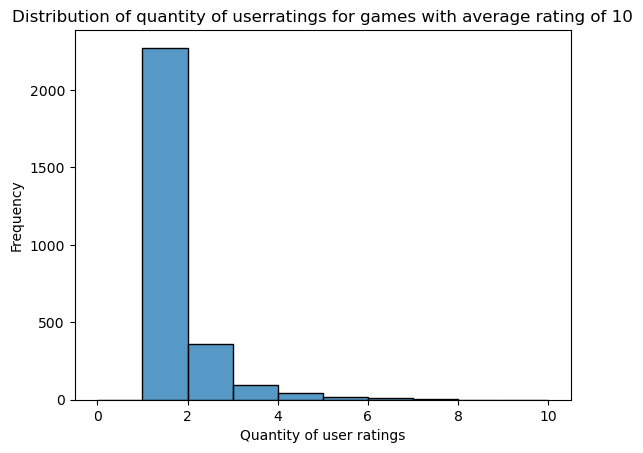

In [28]:
## Only considering games with ratings of 10

# Distribution of average rating for ranked games
sns.histplot(rank_df.loc[(rank_df.average==10),'usersrated'],binrange=(0,10),binwidth=1)
plt.title('Distribution of quantity of userratings for games with average rating of 10')
plt.xlabel("Quantity of user ratings")
plt.ylabel("Frequency")
plt.show()

In [29]:
rank_df.loc[(rank_df.average==10)].sort_values('usersrated',ascending= False).head(10)

id                   name  yearpublished  rank  bayesaverage  \
139682  369988              saurvival           2022     0           0.0   
38273    20244   zombie from the hole           2007     0           0.0   
141136  374635       ritos ancestrais           2023     0           0.0   
144474  385412  jogando com lovecraft           2023     0           0.0   
107061  260129       ready set battle           2019     0           0.0   
111401  277803      cycle of prophecy              0     0           0.0   
153217  418073       imperial borders           2025     0           0.0   
140131  371360                 ravens           2022     0           0.0   
145296  388923      legend of kartlos           2023     0           0.0   
147964  401213          i am champion           2023     0           0.0   

        average  usersrated  is_expansion  abstracts_rank  cgs_rank  \
139682     10.0          17             0             NaN       NaN   
38273      10.0          17             0             NaN       NaN   
141136     10.0          15             0             NaN       NaN   
144474     10.0          13             0             NaN       NaN   
107061     10.0          11             0             NaN       NaN   
111401     10.0          11             0             NaN       NaN   
153217     10.0           8             0             NaN       NaN   
140131     10.0           7             0             NaN       NaN   
145296     10.0           7             0             NaN       NaN   
147964     10.0           7             0             NaN       NaN   

        childrensgames_rank  familygames_rank  partygames_rank  \
139682                  NaN               NaN              NaN   
38273                   NaN               NaN              NaN   
141136                  NaN               NaN              NaN   
144474                  NaN               NaN              NaN   
107061                  NaN               NaN              NaN   
111401                  NaN               NaN              NaN   
153217                  NaN               NaN              NaN   
140131                  NaN               NaN              NaN   
145296                  NaN               NaN              NaN   
147964                  NaN               NaN              NaN   

        strategygames_rank  thematic_rank  wargames_rank  
139682                 NaN            NaN            NaN  
38273                  NaN            NaN            NaN  
141136                 NaN            NaN            NaN  
144474                 NaN            NaN            NaN  
107061                 NaN            NaN            NaN  
111401                 NaN            NaN            NaN  
153217                 NaN            NaN            NaN  
140131                 NaN            NaN            NaN  
145296                 NaN            NaN            NaN  
147964                 NaN            NaN            NaN

In [30]:
# Distribution of average rating for ranked games
sns.histplot(rank_df.loc[(rank_df.average >= 9) & (rank_df.average < 10),'usersrated'],binrange=(0,10),binwidth=1)
plt.title('Distribution of quantity of userratings for games with average rating between 9 and 10')
plt.xlabel("Quantity of user ratings")
plt.ylabel("Frequency")
plt.show()

In [31]:
rank_df.loc[(rank_df.average >= 9) & (rank_df.average < 10)].sort_values('usersrated',ascending= False).tail(10)

id                                             name  \
103629  245749                                    to the death!   
103655  245861                                    spice empires   
103723  246251                                     rune society   
103748  246321                                         geargrid   
138750  367555                              starforce commander   
103964  247385                         admiral: captain's cards   
104018  247639             council of blackthorn: casting doubt   
104085  247884             holistic: quint sequencing card game   
138529  366674               home from oz: expanded starter set   
120368  308690  bolt action: campaign – mariana & palau islands   

        yearpublished  rank  bayesaverage  average  usersrated  is_expansion  \
103629           2018     0           0.0      9.0           1             0   
103655              0     0           0.0      9.0           1             0   
103723           2018     0           0.0      9.0           1             0   
103748           2018     0           0.0      9.0           1             0   
138750           2022     0           0.0      9.0           1             0   
103964           2013     0           0.0      9.0           1             1   
104018           2019     0           0.0      9.0           1             1   
104085           2018     0           0.0      9.0           1             0   
138529           2022     0           0.0      9.0           1             0   
120368           2020     0           0.0      9.0           1             1   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
103629             NaN       NaN                  NaN               NaN   
103655             NaN       NaN                  NaN               NaN   
103723             NaN       NaN                  NaN               NaN   
103748             NaN       NaN                  NaN               NaN   
138750             NaN       NaN                  NaN               NaN   
103964             NaN       NaN                  NaN               NaN   
104018             NaN       NaN                  NaN               NaN   
104085             NaN       NaN                  NaN               NaN   
138529             NaN       NaN                  NaN               NaN   
120368             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  
103629              NaN                 NaN            NaN            NaN  
103655              NaN                 NaN            NaN            NaN  
103723              NaN                 NaN            NaN            NaN  
103748              NaN                 NaN            NaN            NaN  
138750              NaN                 NaN            NaN            NaN  
103964              NaN                 NaN            NaN            NaN  
104018              NaN                 NaN            NaN            NaN  
104085              NaN                 NaN            NaN            NaN  
138529              NaN                 NaN            NaN            NaN  
120368              NaN                 NaN            NaN            NaN

### Average ratings per game

The average of the average user rating for games with more than 0 ratings = 6.46
The median for the average user rating for games with more than 0 ratings = 6.6


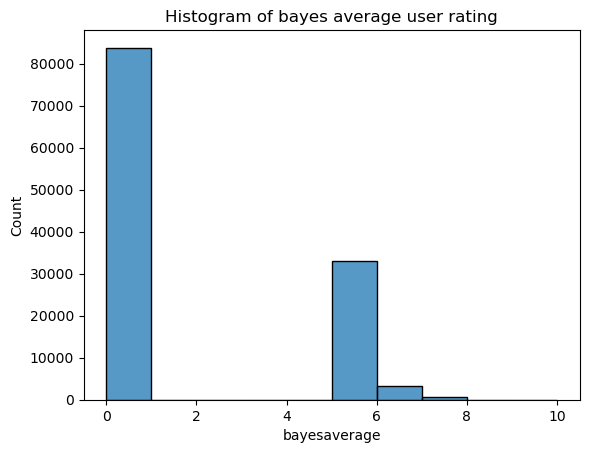

The average of the bayes average user rating for games with more than 0 ratings = 1.74
The median for the bayes average user rating for games with more than 0 ratings = 0.0


In [33]:
# Histogram based on average user rating, for games with a rating
sns.histplot(rank_df.loc[(rank_df.usersrated >0),'average'],binrange=(0,10),binwidth=1)
plt.title('Histogram of average user rating')
plt.show()

print(f'The average of the average user rating for games with more than 0 ratings =',rank_df.loc[(rank_df.usersrated >0),'average'].mean().round(2))
print(f'The median for the average user rating for games with more than 0 ratings =',rank_df.loc[(rank_df.usersrated >0),'average'].median())

# Histogram based on Bayes average user rating, for games with a rating
sns.histplot(rank_df.loc[(rank_df.usersrated >0),'bayesaverage'],binrange=(0,10),binwidth=1)
plt.title('Histogram of bayes average user rating')
plt.show()

print(f'The average of the bayes average user rating for games with more than 0 ratings =',rank_df.loc[(rank_df.usersrated >0),'bayesaverage'].mean().round(2))
print(f'The median for the bayes average user rating for games with more than 0 ratings =',rank_df.loc[(rank_df.usersrated >0),'bayesaverage'].median())

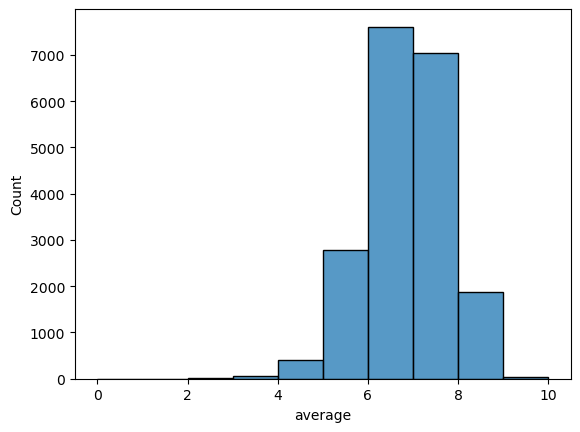

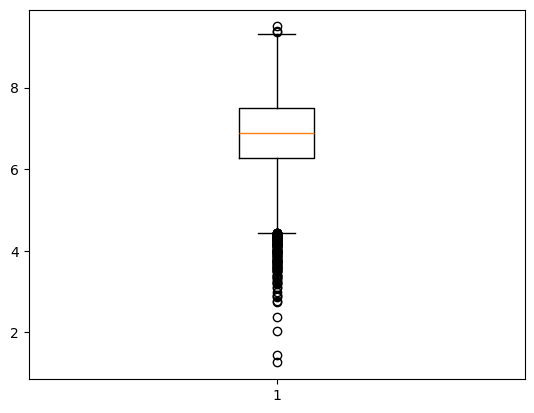

The average of the average user rating for games with more than 0 ratings = 6.85
The median for the average user rating for games with more than 0 ratings = 6.88081


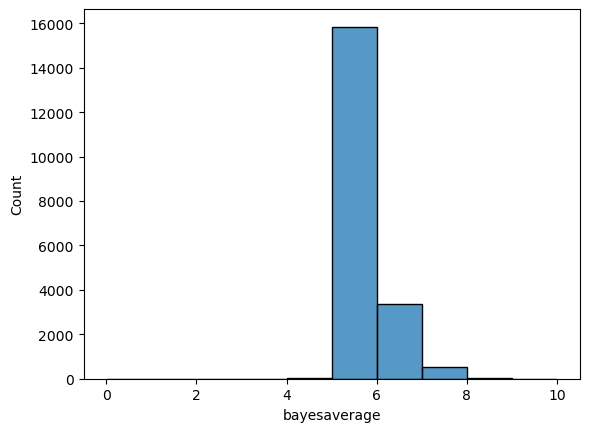

The average of the average user rating for games with more than 0 ratings = 5.81
The median for the average user rating for games with more than 0 ratings = 5.6514


In [34]:
# Histogram based on average user rating, for games with a rating of 100 or more
sns.histplot(rank_df.loc[(rank_df.usersrated >=100),'average'],binrange=(0,10),binwidth=1)
plt.show()

plt.boxplot(rank_df.loc[(rank_df.usersrated >=100),'average'])
plt.show()

print(f'The average of the average user rating for games with more than 0 ratings =',rank_df.loc[(rank_df.usersrated >=100),'average'].mean().round(2))
print(f'The median for the average user rating for games with more than 0 ratings =',rank_df.loc[(rank_df.usersrated >=100),'average'].median())

# Histogram based on Bayes average user rating, for games with a rating of 100 or more
sns.histplot(rank_df.loc[(rank_df.usersrated >=100),'bayesaverage'],binrange=(0,10),binwidth=1)
plt.show()

print(f'The average of the average user rating for games with more than 0 ratings =',rank_df.loc[(rank_df.usersrated >=100),'bayesaverage'].mean().round(2))
print(f'The median for the average user rating for games with more than 0 ratings =',rank_df.loc[(rank_df.usersrated >=100),'bayesaverage'].median())

In [35]:
# Number of games with an average rating and the average of the average rating given

ratings_count = rank_df.loc[(rank_df.usersrated > 0),'average'].count()
ratings_ave = round(rank_df.loc[(rank_df.usersrated > 0),'average'].mean(),2)

print(f'Number of games with average ratings given {ratings_count}')
print(f'Average of average ratings given {ratings_ave}')

Number of games with average ratings given 120772
Average of average ratings given 6.46


### Game rankings

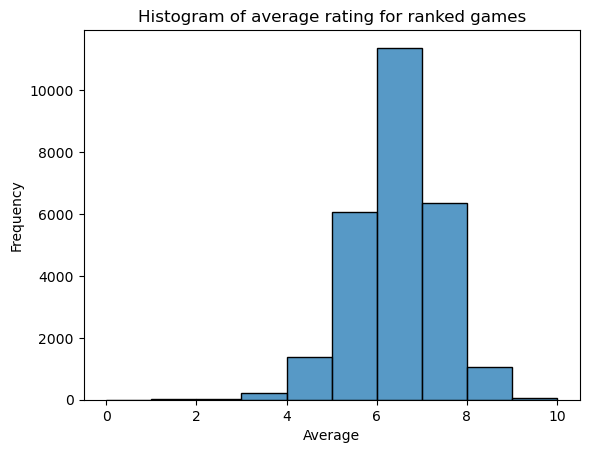

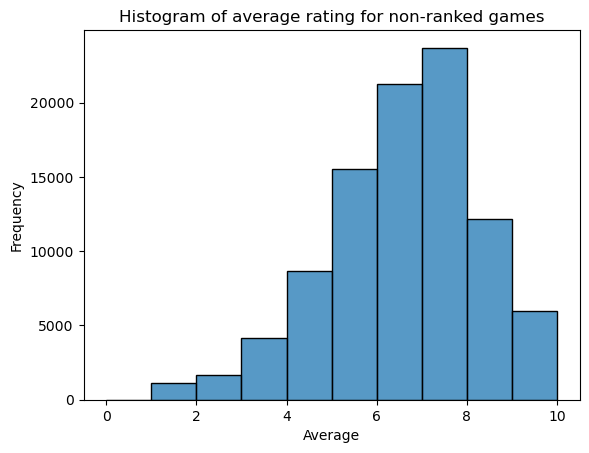

In [37]:
# View of game ratings with and without rankings, for games with at least 1 rating

# Distribution of average rating for ranked games
sns.histplot(rank_df.loc[(rank_df.get('rank')>0)&(rank_df.usersrated > 0),'average'],binrange=(0,10),binwidth=1)
plt.title('Histogram of average rating for ranked games')
plt.xlabel("Average")
plt.ylabel("Frequency")
plt.show()

# Distribution of average rating for non-ranked games
sns.histplot(rank_df.loc[(rank_df.get('rank')==0)&(rank_df.usersrated > 0),'average'],binrange=(0,10),binwidth=1)
plt.title('Histogram of average rating for non-ranked games')
plt.xlabel("Average")
plt.ylabel("Frequency")
plt.show()

# Distribution of bayes average rating for non-ranked games
sns.histplot(rank_df.loc[(rank_df.get('rank')==0)&(rank_df.usersrated > 0),'bayesaverage'],binrange=(0,10),binwidth=1)
plt.title('Histogram of bayes average rating for non-ranked games')
plt.xlabel("Bayes Average")
plt.ylabel("Frequency")
plt.show()

# Distribution of bayes average rating for ranked games
sns.histplot(rank_df.loc[(rank_df.get('rank')>0)&(rank_df.usersrated > 0),'bayesaverage'],binrange=(0,10),binwidth=1)
plt.title('Histogram of bayes average rating for ranked games')
plt.xlabel("Bayes Average")
plt.ylabel("Frequency")
plt.show()



In [38]:
# Checking the number of games with rankings

no_ranks = rank_df.loc[rank_df['rank'] ==0 ,'rank'].count()
yes_ranks = rank_df.loc[(rank_df['rank'] ==0) & (rank_df['usersrated']>=1) ,'rank'].count()

print(f'Games with a ranking = {round(yes_ranks,2)}')
print(f'Games with no ranking = {round(no_ranks,2)}')
print(f'Percentage of games with a ranking = {round(yes_ranks/(len(rank_df.id))*100,2)} %')

Games with a ranking = 94210
Games with no ranking = 129072
Percentage of games with a ranking = 60.53 %


### Versions, editions, expansions, accessories

In [40]:
# Searching the name column for any mention of the word 'version' explictly:
df_keyword_search(rank_df,'name','version')

id  \
5743    125048   
7273     61028   
7455    224303   
11317   356226   
23926    28508   
24244    38337   
30825    10106   
32108    12033   
32400    12442   
32401    12443   
32402    12444   
35222    16245   
38519    20552   
40366    22962   
47931    32266   
49141    33698   
49347    33961   
50234    35042   
56589    43351   
58144    56806   
58160    56942   
59349    62163   
61032    66787   
63277    80473   
64655    89362   
66423    98250   
67150   101705   
67152   101719   
70704   118504   
70705   118505   
70706   118506   
72495   125058   
75535   134601   
76311   137427   
88118   178496   
98023   223671   
101103  235901   
105368  253964   
105912  255816   
109796  269904   
109797  269905   
114046  287469   
115299  292831   
116387  296625   
117420  299821   
117438  299852   
117941  301249   
121343  311710   
121857  313769   
124774  323498   
125895  327071   
128713  336345   
130411  341414   
132092  347084   
133774  351891   
133877  352139   
136628  360225   
137417  363049   
139484  369438   
140449  372426   
141474  375620   
143696  381868   
144982  387485   
144983  387488   
147715  400571   
155621  423824   

                                                                            name  \
5743                                                   dobble: free demo version   
7273                                              d-day dice: free trial version   
7455                                         pocket landship: free trial version   
11317                                        exploding kittens: 2-player version   
23926                                            loaded questions: adult version   
24244                                         fishing for terrorists version 2.0   
30825                                             pocket ungame: couples version   
32108                                              music buff: pop music version   
32400   trivial pursuit the music master game: film & tv edition – video version   
32401      trivial pursuit the music master game: sports edition – video version   
32402      trivial pursuit the music master game: family edition – video version   
35222                                              the ungame: christian version   
38519                             zobmondo!! would you rather...? pocket version   
40366                                              patriot act: the home version   
47931                                               supercross- the home version   
49141               trivial pursuit: dvd – star wars saga edition – case version   
49347                                                zathura promotional version   
50234                                                  dicecapades! kids version   
56589                                         roar of the crowd advanced version   
58144              just add friends: we supply the rest – mexican fiesta version   
58160                                     arctic meltdown: 2 player mini version   
59349                  i've never....the outrageous game of truth (teen version)   
61032                                     ice cream scoops of fun (2008 version)   
63277                                       the truckers version 1.5 tune-up kit   
64655                                               the ungame: catholic version   
66423                                                 pyramid (official version)   
67150                                              shut the box advanced version   
67152                            qui veut gagner des millions ? (version voyage)   
70704                                                  verbillico version junior   
70705                                                    verbillico version mini   
70706                                              verbillico version excellence   
72495                                               dogfight: free trial version   
75535                            

In [41]:
# Searching the name column for any mention of the word 'edition' explictly:
df_keyword_search(rank_df,'name','edition')

id                                                       name  \
4       233078                          twilight imperium: fourth edition   
7       115746                            war of the ring: second edition   
25      341169                        great western trail: second edition   
37      183394                              viticulture essential edition   
41      256960                                  pax pamir: second edition   
...        ...                                                        ...   
155488  423540     summoner wars (second edition): the filth faction deck   
155490  423543  summoner wars (second edition): chosen grove faction deck   
155517  423590                        coral sea solitaire: deluxe edition   
155578  423726                      league of the lexicon: junior edition   
155579  423727                      league of the lexicon: global edition   

        yearpublished  rank  bayesaverage  average  usersrated  is_expansion  \
4                2017     5       8.24195  8.60175       23816             0   
7                2011     8       8.18630  8.54238       21354             0   
25               2021    26       7.90004  8.34021       12653             0   
37               2015    38       7.83834  7.98850       48705             0   
41               2019    42       7.79432  8.19208       14072             0   
...               ...   ...           ...      ...         ...           ...   
155488           2024     0       0.00000  0.00000           0             1   
155490           2024     0       0.00000  0.00000           0             1   
155517           2024     0       0.00000  0.00000           0             0   
155578           2023     0       0.00000  0.00000           0             1   
155579           2023     0       0.00000  0.00000           0             1   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
4                  NaN       NaN                  NaN               NaN   
7                  NaN       NaN                  NaN               NaN   
25                 NaN       NaN                  NaN               NaN   
37                 NaN       NaN                  NaN               NaN   
41                 NaN       NaN                  NaN               NaN   
...                ...       ...                  ...               ...   
155488             NaN       NaN                  NaN               NaN   
155490             NaN       NaN                  NaN               NaN   
155517             NaN       NaN                  NaN               NaN   
155578             NaN       NaN                  NaN               NaN   
155579             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  
4                   NaN                 5.0            3.0            NaN  
7                   NaN                 NaN            4.0            1.0  
25                  NaN                18.0            NaN            NaN  
37                  NaN                37.0            NaN            NaN  
41                  NaN                30.0            NaN            NaN  
...                 ...                 ...            ...            ...  
155488              NaN                 NaN            NaN            NaN  
155490              NaN                 NaN            NaN            NaN  
155517              NaN                 NaN            NaN            NaN  
155578              NaN                 NaN            NaN            NaN  
155579              NaN                 NaN            NaN            NaN  

[3552 rows x 16 columns]

In [42]:
# Searching the name column for any mention of the word 'expansion' explictly:
df_keyword_search(rank_df,'name','expansion')

id                                                   name  \
1916    345976  system gateway (fan expansion for android: netrunner)   
3828    241225                          smash up: that '70s expansion   
4205    178494                       dutch blitz: blue expansion pack   
12492    26004              bitter woods deluxe edition expansion kit   
15646   155745                            stak bots: yellow expansion   
...        ...                                                    ...   
155383  423291                small city deluxe: arcologies expansion   
155408  423343         heroscape: lands of valhalla terrain expansion   
155409  423345        heroscape: waters of valhalla terrain expansion   
155497  423556                          carom golf: garbage expansion   
155570  423710                    kaki lima: motorbike mini expansion   

        yearpublished   rank  bayesaverage  average  usersrated  is_expansion  \
1916             2021   1917       6.23147  9.16739         601             0   
3828             2018   3829       5.86071  7.49131         497             0   
4205             2012   4206       5.81608  7.27618         498             0   
12492            2004  12493       5.54485  7.56667          48             0   
15646            2014  15647       5.52636  6.97872          47             0   
...               ...    ...           ...      ...         ...           ...   
155383           2024      0       0.00000  0.00000           0             1   
155408           2024      0       0.00000  0.00000           0             1   
155409           2024      0       0.00000  0.00000           0             1   
155497           2024      0       0.00000  0.00000           0             1   
155570           2024      0       0.00000  0.00000           0             1   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
1916               NaN       7.0                  NaN               NaN   
3828               NaN       NaN                  NaN               NaN   
4205               NaN       NaN                  NaN               NaN   
12492              NaN       NaN                  NaN               NaN   
15646              NaN       NaN                  NaN               NaN   
...                ...       ...                  ...               ...   
155383             NaN       NaN                  NaN               NaN   
155408             NaN       NaN                  NaN               NaN   
155409             NaN       NaN                  NaN               NaN   
155497             NaN       NaN                  NaN               NaN   
155570             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  
1916                NaN                 NaN            NaN            NaN  
3828                NaN                 NaN            NaN            NaN  
4205              230.0                 NaN            NaN            NaN  
12492               NaN                 NaN            NaN         1936.0  
15646               NaN                 NaN            NaN            NaN  
...                 ...                 ...            ...            ...  
155383              NaN                 NaN            NaN            NaN  
155408              NaN                 NaN            NaN            NaN  
155409              NaN                 NaN            NaN            NaN  
155497              NaN                 NaN            NaN            NaN  
155570              NaN                 NaN            NaN            NaN  

[5080 rows x 16 columns]

In [43]:
# Searching the name column for any mention of the word 'accessories' or 'accessory' explictly:
df_keyword_search(rank_df,'name','accessories')

id  \
2973    119866   
8418    131183   
39519    21850   
115371  293013   

                                                                    name  \
2973                      wings of glory: ww1 rules and accessories pack   
8418                      wings of glory: ww2 rules and accessories pack   
39519                                  axis & allies:  a & a accessories   
115371  blood bowl (2016 edition): head coach's rules & accessories pack   

        yearpublished  rank  bayesaverage  average  usersrated  is_expansion  \
2973             2012  2974       5.98645  7.97540         628             0   
8418             2013  8419       5.60025  7.74950         120             0   
39519            1995     0       0.00000  6.37500          20             1   
115371           2019     0       0.00000  7.30769          13             1   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
2973               NaN       NaN                  NaN               NaN   
8418               NaN       NaN                  NaN               NaN   
39519              NaN       NaN                  NaN               NaN   
115371             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  
2973                NaN                 NaN            NaN          177.0  
8418                NaN                 NaN            NaN         1179.0  
39519               NaN                 NaN            NaN            NaN  
115371              NaN                 NaN            NaN            NaN

In [44]:
# Searching the name column for any mention of the word 'accessory' explictly:
df_keyword_search(rank_df,'name','accessory')

id  \
6785      5985   
29954     8695   
29955     8696   
29956     8697   
29957     8698   
32868    13102   
47474    31693   
48938    33456   
71575   121924   
74770   131996   
125137  324725   

                                                                     name  \
6785                                         miscellaneous game accessory   
29954                                     speed circuit: accessory pack 1   
29955                                     speed circuit: accessory pack 2   
29956                                     speed circuit: accessory pack 3   
29957                                     speed circuit: accessory pack 4   
32868   entrepreneur's accessory to monopoly (fan expansion for monopoly)   
47474                             miscellaneous miniatures game accessory   
48938                                   miscellaneous card game accessory   
71575          dust tactics: building accessory pack – "warzone tenement"   
74770                               dust tactics: airfield accessory pack   
125137  shadows of brimstone: depth track accessory + card mini-expansion   

        yearpublished  rank  bayesaverage   average  usersrated  is_expansion  \
6785                0  6786       5.64903   7.07733         232             0   
29954            1980     0       5.52833   7.41765          34             1   
29955               0     0       0.00000   7.31579          19             1   
29956               0     0       0.00000   7.15000          20             1   
29957            1991     0       0.00000   7.10526          19             1   
32868            1989     0       0.00000  10.00000           1             1   
47474               0     0       0.00000   6.75294          17             0   
48938               0     0       0.00000   6.32059          17             0   
71575            2012     0       0.00000   7.52353          17             1   
74770            2013     0       0.00000   7.47222          18             1   
125137           2020     0       0.00000   8.49630          27             1   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
6785               NaN       NaN                  NaN               NaN   
29954              NaN       NaN                  NaN               NaN   
29955              NaN       NaN                  NaN               NaN   
29956              NaN       NaN                  NaN               NaN   
29957              NaN       NaN                  NaN               NaN   
32868              NaN       NaN                  NaN               NaN   
47474              NaN       NaN                  NaN               NaN   
48938              NaN       NaN                  NaN               NaN   
71575              NaN       NaN                  NaN               NaN   
74770              NaN       NaN                  NaN               NaN   
125137             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  
6785                NaN              2197.0            NaN         1471.0  
29954               NaN                 NaN            NaN            NaN  
29955               NaN                 NaN            NaN            NaN  
29956               NaN                 NaN            NaN            NaN  
29957               NaN                 NaN            NaN            NaN  
32868               NaN                 NaN            NaN            NaN  
47474               NaN                 NaN            NaN            NaN  
48938               NaN                 NaN            NaN            NaN  
71575               NaN                 NaN            NaN            NaN  
74770               NaN                 NaN            NaN            NaN  
125137              NaN                 NaN            NaN            NaN

In [45]:
# Returning a set of single words that come before the word 'edition'
ed_set = set()

# Loop through each name in the DataFrame
for i in rank_df['name']:
    # Check if 'edition' is in the string and find the word before it
    match = re.search(r'(\b\w+\b)\s+edition', i)
    if match:
        # Append the matched word (group 1) to the set
        ed_set.add(match.group(1))

# Number of different single words which come before the word 'edition'
display(len(ed_set))

# The different single words which come before the word 'edition'
display(print(ed_set))

799

{'fails', 'first', 'primary', 'materials', 'portable', 'onyx', 'discovery', 'turbo', 'core', 'chaos', 'explorer', 'ipswich', 'slim', 'twilight', 'reindeer', 'yiddish', 'somerset', 'radical', 'rivalry', 'bsfw', 'disasters', 'squarepants', 'trek', 'cd', 'gardening', 'enjoyment', 'chain', 'ladies', 'italian', 'grinstead', 'redditch', 'expanse', 'bayern', 'giant', 'mega', 'silver', 'unsw', 'reviewed', 'stirling', 'school', 'safari', 'mas', 'mature', 'preschool', 'west', 'legendary', 'catholic', 'tokyo', 'montana', 'free', 'drunk', 'accra', 'omniclaw', 'winter', 'classic', 'action', 'com', 'pulitzer', 'cal', 'ninth', '2016', 'brisbane', 'truck', 'cornwall', 'easter', 'rotlicht', '8', 'china', 'star', 'atlanta', 'trip', 'chocolate', 'designer', 'cooking', 'landshut', 'movie', 'signature', 'rummy', 'meal', 'card', 'limited', 'nottingham', '2259', 'america', 'sexy', 'kyoto', '2018', 'bears', 'travel', 'leeds', '2007', 'petty', 'belfast', 'salesman', 'haderach', 'island', 'mystery', '1998', 'he

None

In [46]:
# Adding two columns to rank_df, one which shows the prefix of the game name, and the other showing the total count of these name prefix's:
rank_df['name_prefix'] = rank_df['name'].str.extract(r'^([^:(]+)') # Name_prefix column

rank_df['name_prefix_count'] = rank_df['name_prefix'].map(rank_df['name_prefix'].value_counts()).fillna(1) # Total count of name prefix's

rank_df.sort_values(by = 'name_prefix_count', ascending = False)

id                                            name  yearpublished  \
63560    83318                 monopoly: isle of arran edition           2010   
127502  332580            monopoly: venetian palazzo las vegas           2014   
77013   139856                               monopoly: puteaux           2008   
127458  332476                   monopoly: circuit paul ricard           2015   
127492  332562   monopoly: new york yankees collectors edition           2006   
...        ...                                             ...            ...   
82872   160747                                      töff-töff!              0   
82871   160746                 bergreise ein neues würfelspiel              0   
82870   160733                          el club de la aventura              0   
34699    15566  an account of peter coddle's visit to new york           1858   
155633  423890   cyberpunk unfolds: pop-up mystery escape game           2024   

        rank  bayesaverage   average  usersrated  is_expansion  \
63560      0           0.0   2.00000           1             0   
127502     0           0.0   9.50000           2             0   
77013      0           0.0   5.66667           3             0   
127458     0           0.0   4.00000           3             0   
127492     0           0.0  10.00000           1             0   
...      ...           ...       ...         ...           ...   
82872      0           0.0   0.00000           0             0   
82871      0           0.0   0.00000           0             0   
82870      0           0.0   5.95500           4             0   
34699      0           0.0   5.50000           4             0   
155633     0           0.0   0.00000           0             0   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
63560              NaN       NaN                  NaN               NaN   
127502             NaN       NaN                  NaN               NaN   
77013              NaN       NaN                  NaN               NaN   
127458             NaN       NaN                  NaN               NaN   
127492             NaN       NaN                  NaN               NaN   
...                ...       ...                  ...               ...   
82872              NaN       NaN                  NaN               NaN   
82871              NaN       NaN                  NaN               NaN   
82870              NaN       NaN                  NaN               NaN   
34699              NaN       NaN                  NaN               NaN   
155633             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  \
63560               NaN                 NaN            NaN            NaN   
127502              NaN                 NaN            NaN            NaN   
77013               NaN                 NaN            NaN            NaN   
127458              NaN                 NaN            NaN            NaN   
127492              NaN                 NaN            NaN            NaN   
...                 ...                 ...            ...            ...   
82872               NaN                 NaN            NaN            NaN   
82871               NaN                 NaN            NaN            NaN   
82870               NaN                 NaN            NaN            NaN   
34699               NaN                 NaN            NaN            NaN   
155633              NaN                 NaN            NaN            NaN   

                                           name_prefix  name_prefix_count  
63560                                         monopoly             1278.0  
127502                                        monopoly             1278.0  
77013                                         monopoly             1278.0  
127458                                        monopoly             1278.0  
127492                                  

In [47]:
# Checking null values in the new name_prefix column of rank_df
display(check_df(rank_df[['name_prefix']]))
display(rank_df.loc[pd.isna(rank_df['name_prefix'])])

#### DataFrame dimensions

(155634, 1)

<br>

#### Data Types, zeros and nulls

Data type  Zero counts  Zero count %  Null counts  Null count %
name_prefix    object            0           0.0           10          0.01

None

id                                         name  yearpublished  \
9320    128568           (your name here) and the argonauts           2012   
20609   282587                     (may cause) side effects           2019   
30724     9978             ( your name here ) of the jungle           1999   
33524    14052  (t)raumschiff surprise periode 1: das spiel           2004   
73483   128440                            (unnamed wargame)              0   
126334  328544                                   (ta)aliens           2018   
140625  372978                                 (des)memoria           2019   
141438  375523                              (nie)powinieneś           2019   
141439  375524                            (nie)powinieneś 2           2020   
149576  405872                            (nie)powinieneś 3           2022   

         rank  bayesaverage  average  usersrated  is_expansion  \
9320     9321       5.58338  7.12620         129             0   
20609   20610       5.50660  6.22286          35             0   
30724       0       0.00000  7.00000           2             0   
33524       0       0.00000  4.75000           4             0   
73483       0       0.00000  0.00000           0             0   
126334      0       0.00000  0.00000           0             0   
140625      0       0.00000  0.00000           0             0   
141438      0       0.00000  5.27778          18             0   
141439      0       0.00000  5.85714           7             0   
149576      0       0.00000  4.50000           2             0   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
9320               NaN       NaN                  NaN               NaN   
20609              NaN       NaN                  NaN               NaN   
30724              NaN       NaN                  NaN               NaN   
33524              NaN       NaN                  NaN               NaN   
73483              NaN       NaN                  NaN               NaN   
126334             NaN       NaN                  NaN               NaN   
140625             NaN       NaN                  NaN               NaN   
141438             NaN       NaN                  NaN               NaN   
141439             NaN       NaN                  NaN               NaN   
149576             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  \
9320                NaN                 NaN            NaN            NaN   
20609               NaN                 NaN            NaN            NaN   
30724               NaN                 NaN            NaN            NaN   
33524               NaN                 NaN            NaN            NaN   
73483               NaN                 NaN            NaN            NaN   
126334              NaN                 NaN            NaN            NaN   
140625              NaN                 NaN            NaN            NaN   
141438              NaN                 NaN            NaN            NaN   
141439              NaN                 NaN            NaN            NaN   
149576              NaN                 NaN            NaN            NaN   

       name_prefix  name_prefix_count  
9320           NaN                1.0  
20609          NaN                1.0  
30724          NaN                1.0  
33524          NaN                1.0  
73483          NaN                1.0  
126334         NaN                1.0  
140625         NaN                1.0  
141438         NaN                1.0  
141439         NaN                1.0  
149576         NaN                1.0

In [48]:
# Filtering rank_df to include the first recorded example of each game prefix to identify most common name_prefix
rank_df.loc[(rank_df['yearpublished'].astype(str).str.len() == 4) &
            (rank_df['yearpublished']>0),
            ['id','name','yearpublished','name_prefix_count','name_prefix']].\
            sort_values(by = ['name_prefix_count','name_prefix','yearpublished'],ascending = [False,True,True]).\
            drop_duplicates(subset='name_prefix', keep='first').head(10)

id                                        name  yearpublished  \
26556    1406                                    monopoly           1935   
23994    5244          star wars: destroy death star game           1977   
1350     1540                                  battletech           1985   
41251   24081            bushido: a batalha de sekigahara           2005   
35496   16601   star trek: the invasion of klingon empire           1982   
547    146791  shadows of brimstone: city of the ancients           2014   
167       463                        magic: the gathering           1993   
26497    2952              trivial pursuit: genus edition           1981   
1109      823                       the lord of the rings           2000   
95086  208161               pokémon tcg: jungle expansion           1997   

       name_prefix_count            name_prefix  
26556             1278.0               monopoly  
23994              560.0              star wars  
1350               471.0             battletech  
41251              309.0                bushido  
35496              309.0              star trek  
547                284.0   shadows of brimstone  
167                279.0                  magic  
26497              262.0        trivial pursuit  
1109               200.0  the lord of the rings  
95086              198.0            pokémon tcg

In [49]:
# Exploring a known common example: Monopoly
rank_df.loc[(rank_df['name_prefix']=='monopoly') &
            (rank_df['yearpublished']!=0)]\
            .sort_values(by ='yearpublished',ascending =True)

id                                                  name  \
26556     1406                                              monopoly   
44925    28638                                      monopoly: german   
47210    31351                             monopoly: santiago, chile   
23227    13154                             monopoly: popular edition   
24863    14459                                 monopoly: new zealand   
...        ...                                                   ...   
148371  402421                           monopoly: dell technologies   
148414  402500  monopoly: teenage mutant ninja turtles mutant mayhem   
155061  422465         monopoly: the super mario bros. movie edition   
147548  400026                     monopoly: flip edition – fortnite   
153544  419129                                        monopoly: lier   

        yearpublished   rank  bayesaverage  average  usersrated  is_expansion  \
26556            1935  26557       4.28826  4.36168       36023             0   
44925            1936      0       0.00000  5.36923          26             0   
47210            1950      0       0.00000  5.07500          20             0   
23227            1954  23228       5.49424  5.24608          34             0   
24863            1960  24864       5.48015  4.48571          35             0   
...               ...    ...           ...      ...         ...           ...   
148371           2023      0       0.00000  0.00000           0             0   
148414           2023      0       0.00000  5.00000           1             0   
155061           2023      0       0.00000  1.75000           1             0   
147548           2023      0       0.00000  4.50000           2             0   
153544           2024      0       0.00000  0.00000           0             0   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
26556              NaN       NaN                  NaN            3219.0   
44925              NaN       NaN                  NaN               NaN   
47210              NaN       NaN                  NaN               NaN   
23227              NaN       NaN                  NaN               NaN   
24863              NaN       NaN                  NaN               NaN   
...                ...       ...                  ...               ...   
148371             NaN       NaN                  NaN               NaN   
148414             NaN       NaN                  NaN               NaN   
155061             NaN       NaN                  NaN               NaN   
147548             NaN       NaN                  NaN               NaN   
153544             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  \
26556               NaN                 NaN            NaN            NaN   
44925               NaN                 NaN            NaN            NaN   
47210               NaN                 NaN            NaN            NaN   
23227               NaN                 NaN            NaN            NaN   
24863               NaN                 NaN            NaN            NaN   
...                 ...                 ...            ...            ...   
148371              NaN                 NaN            NaN            NaN   
148414              NaN                 NaN            NaN            NaN   
155061              NaN                 NaN            NaN            NaN   
147548              NaN                 NaN            NaN            NaN   
153544              NaN                 NaN            NaN            NaN   

       name_prefix  name_prefix_count  
26556     monopoly             1278.0  
44925     monopoly             1278.0  
47210     monopoly             1278.0  
23227     monopoly             1278.0  
24863     monopoly             1278.0  
...            ...                ...  
148371    monopoly             1278.0  
148414    monopoly          

In [50]:
# Exploring a known common example: starwars
rank_df.loc[(rank_df['name_prefix']=='star wars') &
            (rank_df['yearpublished']!=0)]\
            .sort_values(by ='yearpublished',ascending =True)

id  \
32379    12415   
57750    54172   
23994     5244   
26433     4845   
25215     6792   
...        ...   
151552  412565   
151525  412472   
1054    387866   
6662    410655   
155582  423734   

                                                                            name  \
32379                                         star wars: the adventures of r2-d2   
57750                                         star wars: destroy death star game   
23994                                         star wars: destroy death star game   
26433                                     star wars: escape from death star game   
25215                                  star wars: hoth ice planet adventure game   
...                                                                          ...   
151552                                                     star wars: trench run   
151525  star wars: legion – fifth brother and seventh sister operative expansion   
1054                                                        star wars: unlimited   
6662                                                   star wars: bounty hunters   
155582                                             star wars: legion – bad batch   

        yearpublished   rank  bayesaverage   average  usersrated  \
32379            1977      0       0.00000   3.81852          27   
57750            1977      0       0.00000   4.00000           3   
23994            1977  23995       5.48874   5.44196         112   
26433            1977  26434       5.33631   4.80921         594   
25215            1980  25216       5.47438   4.62327          55   
...               ...    ...           ...       ...         ...   
151552           2024      0       0.00000  10.00000           1   
151525           2024      0       0.00000   9.75000           2   
1054             2024   1055       6.58029   8.18848        1614   
6662             2024   6663       5.65367   7.17073         288   
155582           2024      0       0.00000   0.00000           0   

        is_expansion  abstracts_rank  cgs_rank  childrensgames_rank  \
32379              0             NaN       NaN                  NaN   
57750              0             NaN       NaN                  NaN   
23994              0             NaN       NaN                  NaN   
26433              0             NaN       NaN                  NaN   
25215              0             NaN       NaN                  NaN   
...              ...             ...       ...                  ...   
151552             0             NaN       NaN                  NaN   
151525             1             NaN       NaN                  NaN   
1054               0             NaN      10.0                  NaN   
6662               0             NaN       NaN                  NaN   
155582             1             NaN       NaN                  NaN   

        familygames_rank  partygames_rank  strategygames_rank  thematic_rank  \
32379                NaN              NaN                 NaN            NaN   
57750                NaN              NaN                 NaN            NaN   
23994                NaN              NaN                 NaN            NaN   
26433             3182.0              NaN                 NaN            NaN   
25215                NaN              NaN                 NaN            NaN   
...                  ...              ...                 ...            ...   
151552               NaN              NaN                 NaN            NaN   
151525               NaN              NaN                 NaN            NaN   
1054                 NaN              NaN                 NaN            NaN   
6662                 NaN              NaN                 NaN            NaN   
155582               NaN              NaN                 NaN            NaN   

        wargames_rank name_prefix  name_prefix_count  
32379             NaN   star wars              560.0  
57750             NaN   star wars            

In [51]:
# Exploring a known common example: magic
rank_df.loc[(rank_df['name_prefix']=='magic') &
            (rank_df['yearpublished']!=0)]\
            .sort_values(by ='yearpublished',ascending =True)

id                                                name  \
167        463                                magic: the gathering   
112126  280890              magic: the gathering – limited edition   
96970   218386               magic: the gathering – arabian nights   
134345  353507              magic: the gathering – revised edition   
96971   218388                  magic: the gathering – antiquities   
...        ...                                                 ...   
148799  403359  magic: the gathering universes beyond – doctor who   
150795  409973       magic: the gathering – lost caverns of ixalan   
153647  419395  magic: the gathering – outlaws of thunder junction   
152086  414319      magic: the gathering – murders at karlov manor   
155418  423358          magic: the gathering – modern horizons iii   

        yearpublished  rank  bayesaverage  average  usersrated  is_expansion  \
167              1993   168       7.39874  7.57520       39817             0   
112126           1993     0       0.00000  7.62500          16             0   
96970            1993     0       5.54909  7.57692          52             1   
134345           1994     0       0.00000  7.40476          21             1   
96971            1994     0       5.54421  7.21667          54             1   
...               ...   ...           ...      ...         ...           ...   
148799           2023     0       0.00000  8.06818          22             1   
150795           2023     0       0.00000  7.81250           8             1   
153647           2024     0       0.00000  7.12500           4             1   
152086           2024     0       0.00000  6.12500           4             1   
155418           2024     0       0.00000  4.50000           1             1   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
167                NaN      18.0                  NaN               NaN   
112126             NaN       NaN                  NaN               NaN   
96970              NaN       NaN                  NaN               NaN   
134345             NaN       NaN                  NaN               NaN   
96971              NaN       NaN                  NaN               NaN   
...                ...       ...                  ...               ...   
148799             NaN       NaN                  NaN               NaN   
150795             NaN       NaN                  NaN               NaN   
153647             NaN       NaN                  NaN               NaN   
152086             NaN       NaN                  NaN               NaN   
155418             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  \
167                 NaN                 NaN            NaN            NaN   
112126              NaN                 NaN            NaN            NaN   
96970               NaN                 NaN            NaN            NaN   
134345              NaN                 NaN            NaN            NaN   
96971               NaN                 NaN            NaN            NaN   
...                 ...                 ...            ...            ...   
148799              NaN                 NaN            NaN            NaN   
150795              NaN                 NaN            NaN            NaN   
153647              NaN                 NaN            NaN            NaN   
152086              NaN                 NaN            NaN            NaN   
155418              NaN                 NaN            NaN            NaN   

       name_prefix  name_prefix_count  
167          magic              279.0  
112126       magic              279.0  
96970        magic              279.0  
134345       magic              279.0  
96971        magic              279.0  
...            ...                ...  
148799       magic              279.0  
150795       magic              279.0  
153647       magic      

In [52]:
# Exploring a known common example: pokémon tcg
rank_df.loc[(rank_df['name_prefix']=='pokémon tcg') &
            (rank_df['yearpublished']!=0)]\
            .sort_values(by ='yearpublished',ascending =True)

id                                                 name  \
102696  241908    pokémon tcg: the mystery of the fossils expansion   
95088   208164                   pokémon tcg: team rocket expansion   
102697  241909                   pokémon tcg: rocket gang expansion   
95086   208161                        pokémon tcg: jungle expansion   
95087   208162                        pokémon tcg: fossil expansion   
...        ...                                                  ...   
151054  410664                  pokémon tcg: scarlet & violet – 151   
151817  413407         pokémon tcg: scarlet & violet – paradox rift   
155001  422335      pokémon tcg: scarlet & violet – obsidian flames   
154956  422190  pokémon tcg: scarlet & violet – twilight masquerade   
151815  413404        pokémon tcg: scarlet & violet – paldean fates   

        yearpublished  rank  bayesaverage  average  usersrated  is_expansion  \
102696           1997     0           0.0   6.0000           1             1   
95088            1997     0           0.0   7.0625           8             1   
102697           1997     0           0.0   6.0000           1             1   
95086            1997     0           0.0   6.7000          10             1   
95087            1997     0           0.0   6.8000           9             1   
...               ...   ...           ...      ...         ...           ...   
151054           2023     0           0.0   9.0000           1             1   
151817           2023     0           0.0   7.5000           1             1   
155001           2023     0           0.0   8.0000           1             1   
154956           2024     0           0.0   8.6000           1             1   
151815           2024     0           0.0   8.5000           2             1   

        abstracts_rank  cgs_rank  childrensgames_rank  familygames_rank  \
102696             NaN       NaN                  NaN               NaN   
95088              NaN       NaN                  NaN               NaN   
102697             NaN       NaN                  NaN               NaN   
95086              NaN       NaN                  NaN               NaN   
95087              NaN       NaN                  NaN               NaN   
...                ...       ...                  ...               ...   
151054             NaN       NaN                  NaN               NaN   
151817             NaN       NaN                  NaN               NaN   
155001             NaN       NaN                  NaN               NaN   
154956             NaN       NaN                  NaN               NaN   
151815             NaN       NaN                  NaN               NaN   

        partygames_rank  strategygames_rank  thematic_rank  wargames_rank  \
102696              NaN                 NaN            NaN            NaN   
95088               NaN                 NaN            NaN            NaN   
102697              NaN                 NaN            NaN            NaN   
95086               NaN                 NaN            NaN            NaN   
95087               NaN                 NaN            NaN            NaN   
...                 ...                 ...            ...            ...   
151054              NaN                 NaN            NaN            NaN   
151817              NaN                 NaN            NaN            NaN   
155001              NaN                 NaN            NaN            NaN   
154956              NaN                 NaN            NaN            NaN   
151815              NaN                 NaN            NaN            NaN   

        name_prefix  name_prefix_count  
102696  pokémon tcg              198.0  
95088   pokémon tcg              198.0  
102697  pokémon tcg              198.0  
95086   pokémon tcg              198.0  
95087   pokémon tcg              198.0  
...             ...                ...  
151054  pokémon tcg              198.0  
151817  pokémon tcg              198.0  
155

In [53]:
# Exploring a known common example: wingspan
rank_df.loc[(rank_df['name_prefix']=='wingspan') &
            (rank_df['yearpublished']!=0)]\
            .sort_values(by ='yearpublished',ascending =True)

id                                  name  yearpublished  rank  \
26      266192                              wingspan           2019    27   
114703  290448          wingspan: european expansion           2019     0   
114795  290837      wingspan: swift-start promo pack           2019     0   
139329  368895  wingspan: grus japonensis promo card           2019     0   
117701  300580           wingspan: oceania expansion           2020     0   

        bayesaverage  average  usersrated  is_expansion  abstracts_rank  \
26           7.89943  8.04780       93191             0             NaN   
114703       7.93759  8.35031       14933             1             NaN   
114795       6.50665  7.91667        1625             1             NaN   
139329       0.00000  5.46154          13             1             NaN   
117701       7.89530  8.46814       10273             1             NaN   

        cgs_rank  childrensgames_rank  familygames_rank  partygames_rank  \
26           NaN                  NaN               2.0              NaN   
114703       NaN                  NaN               NaN              NaN   
114795       NaN                  NaN               NaN              NaN   
139329       NaN                  NaN               NaN              NaN   
117701       NaN                  NaN               NaN              NaN   

        strategygames_rank  thematic_rank  wargames_rank name_prefix  \
26                    36.0            NaN            NaN    wingspan   
114703                 NaN            NaN            NaN    wingspan   
114795                 NaN            NaN            NaN    wingspan   
139329                 NaN            NaN            NaN    wingspan   
117701                 NaN            NaN            NaN    wingspan   

        name_prefix_count  
26                    5.0  
114703                5.0  
114795                5.0  
139329                5.0  
117701                5.0

### Saving updated BGG ranked games data

In [55]:
# Saving the updated BGG ranked games data to csv
rank_df.to_csv('BGG_games_ranked.csv', index=False) 